<a href="https://colab.research.google.com/github/patrick-seib/econ-489/blob/main/489_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

drive.mount('/content/drive/')
df_2019_to_2023 = pd.read_csv('/content/drive/My Drive/489_Data/household_expenditure.csv', index_col=0)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


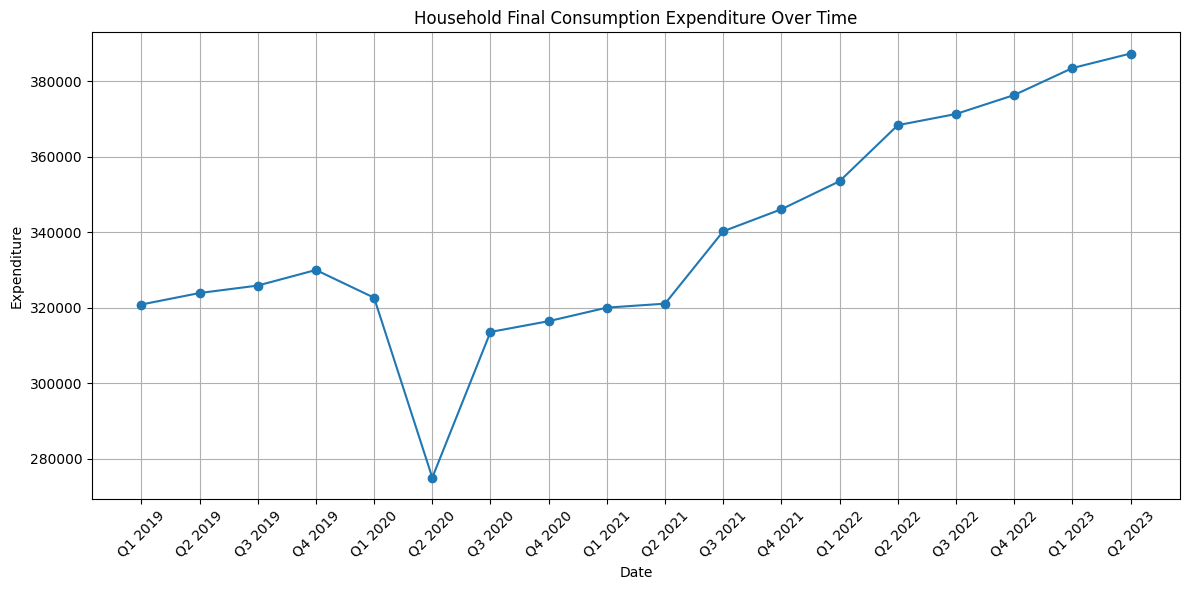

In [ ]:
df_2019_to_2023['Household final consumption expenditure'] = pd.to_numeric(
    df_2019_to_2023['Household final consumption expenditure'].str.replace(',', ''),
    errors='coerce'
)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_2019_to_2023.index, df_2019_to_2023['Household final consumption expenditure'], marker='o', linestyle='-')
plt.title('Household Final Consumption Expenditure Over Time')
plt.xlabel('Date')
plt.ylabel('Expenditure')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


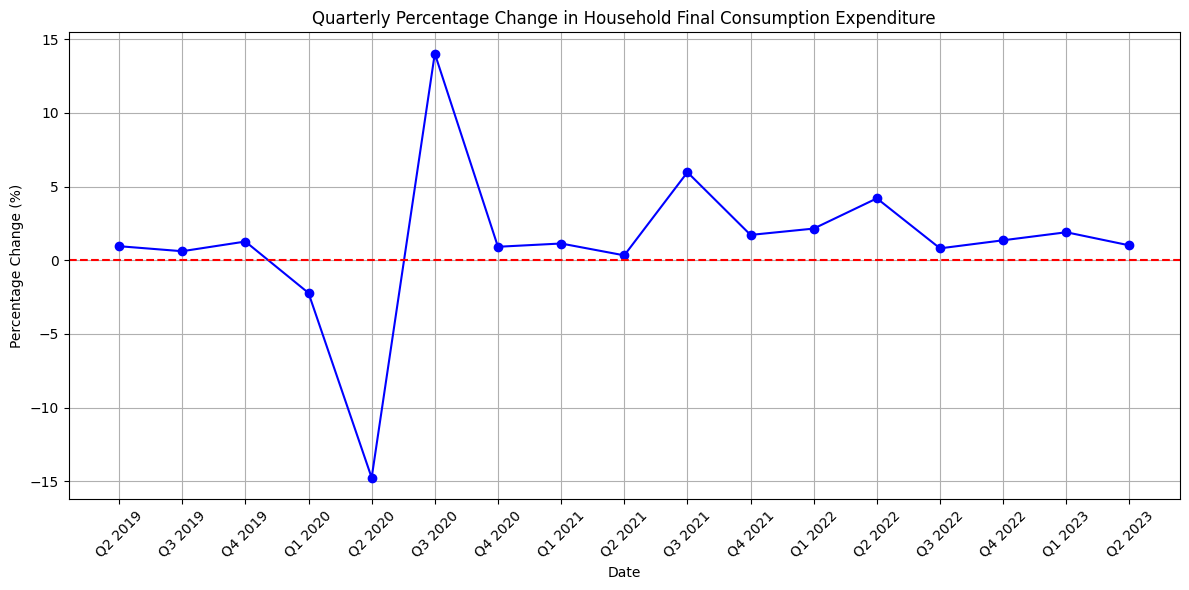

In [ ]:
# Calculate the percentage change for each quarter
df_2019_to_2023['Pct_Change'] = df_2019_to_2023['Household final consumption expenditure'].pct_change() * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_2019_to_2023.index, df_2019_to_2023['Pct_Change'], marker='o', linestyle='-', color='b')
plt.title('Quarterly Percentage Change in Household Final Consumption Expenditure')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


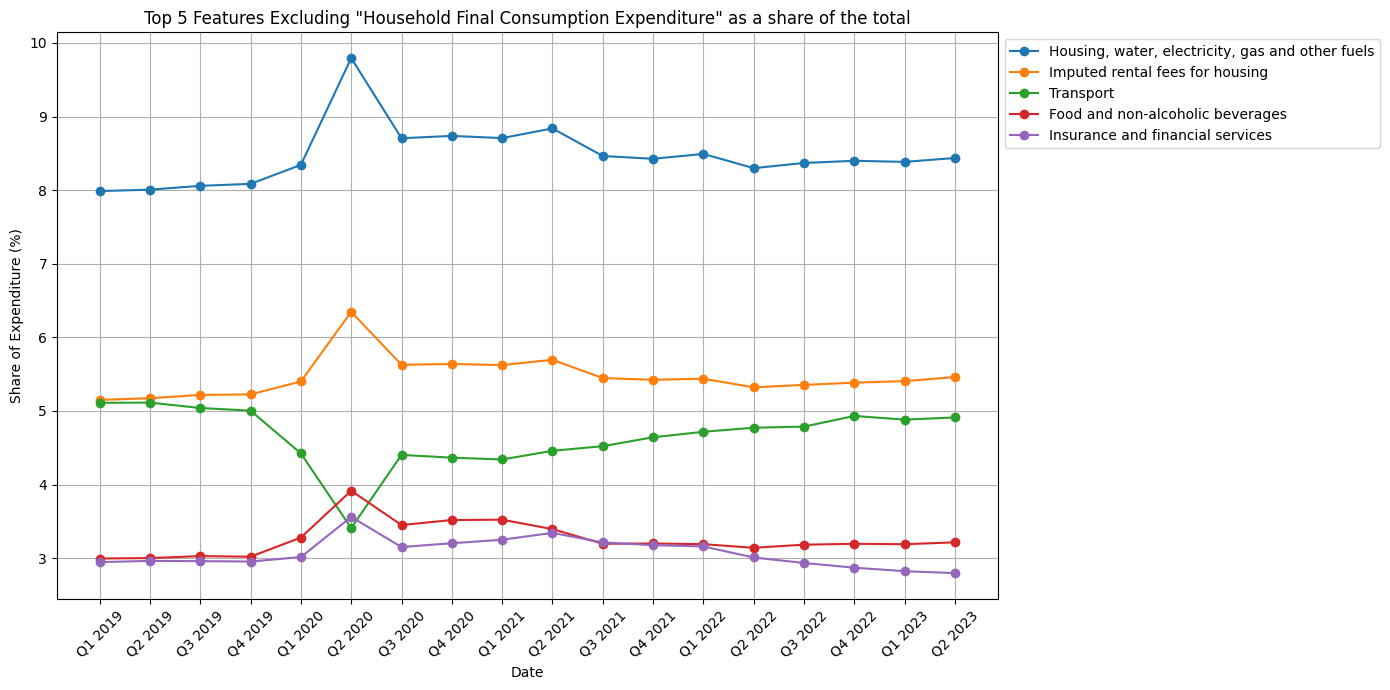

(None,
 Index(['Housing, water, electricity, gas and other fuels',
        'Imputed rental fees for housing', 'Transport',
        'Food and non-alcoholic beverages', 'Insurance and financial services'],
       dtype='object'))

In [ ]:
household_data_numeric = df_2019_to_2023.applymap(lambda x: pd.to_numeric(str(x).replace(',', ''), errors='coerce'))

total_expenditure = household_data_numeric.sum(axis=1)

# Calculate the share of each feature in household expenditure
share_of_expenditure = (household_data_numeric.div(total_expenditure, axis=0)) * 100

# Calculate the average share of each feature and identify the top 5 features
avg_share = share_of_expenditure.mean().sort_values(ascending=False)
top_5_features = avg_share.head(5).index

# Exclude "Household final consumption expenditure" and find the next top 5 features
top_5_features_excl = avg_share.drop('Household final consumption expenditure').head(5).index

plt.figure(figsize=(14, 7))
for feature in top_5_features_excl:
    plt.plot(share_of_expenditure.index, share_of_expenditure[feature], marker='o', label=feature)

plt.title('Top 5 Features Excluding "Household Final Consumption Expenditure" as a share of the total')
plt.xlabel('Date')
plt.ylabel('Share of Expenditure (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show(), top_5_features_excl


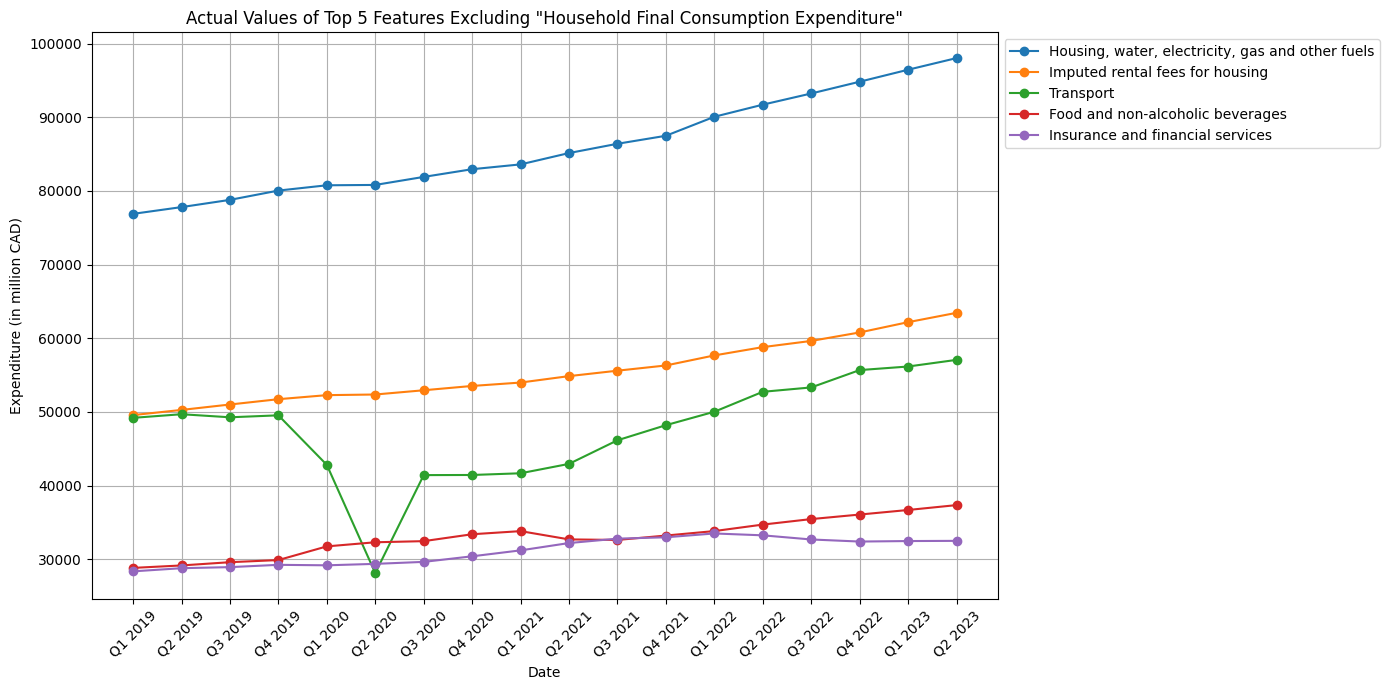

In [ ]:
# Plotting actual values of the top 5 features (excluding Household final consumption expenditure)
plt.figure(figsize=(14, 7))
for feature in top_5_features_excl:
    plt.plot(household_data_numeric.index, household_data_numeric[feature], marker='o', label=feature)

plt.title('Actual Values of Top 5 Features Excluding "Household Final Consumption Expenditure"')
plt.xlabel('Date')
plt.ylabel('Expenditure (in million CAD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

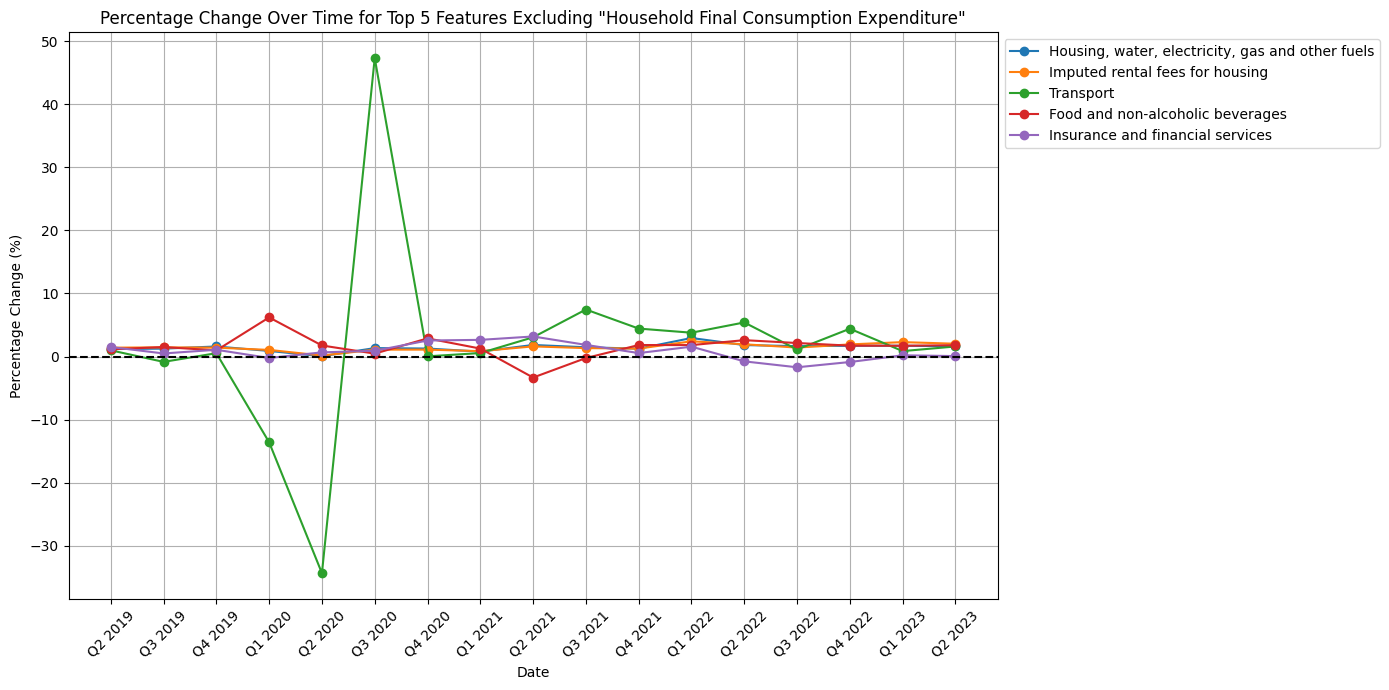

In [ ]:
# Calculate the percentage change for each quarter for the top 5 features
pct_change_top_5 = household_data_numeric[top_5_features_excl].pct_change() * 100

plt.figure(figsize=(14, 7))
for feature in top_5_features_excl:
    plt.plot(pct_change_top_5.index, pct_change_top_5[feature], marker='o', label=feature)

plt.title('Percentage Change Over Time for Top 5 Features Excluding "Household Final Consumption Expenditure"')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

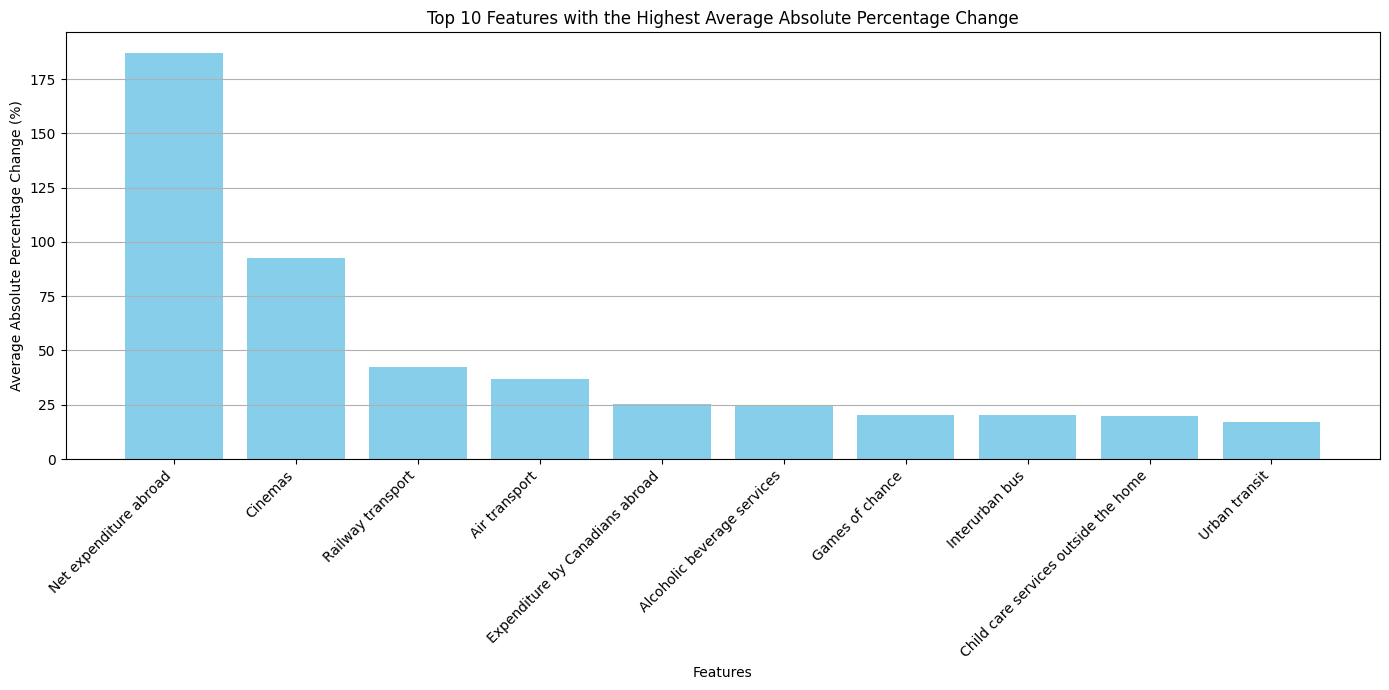

(None,
 Net expenditure abroad                  187.214109
 Cinemas                                  92.743919
 Railway transport                        42.524088
 Air transport                            36.766387
 Expenditure by Canadians abroad          25.511797
 Alcoholic beverage services              25.100339
 Games of chance                          20.333763
 Interurban bus                           20.254258
 Child care services outside the home     19.746927
 Urban transit                            17.252748
 dtype: float64)

In [ ]:
numeric_data = df_2019_to_2023.applymap(lambda x: pd.to_numeric(str(x).replace(',', ''), errors='coerce'))

# Calculate the percentage change for all columns
pct_change_data = numeric_data.pct_change() * 100

# Calculate the average absolute percentage change for each feature
avg_abs_pct_change = pct_change_data.abs().mean().sort_values(ascending=False)

# Get the top 10 features (excluding 'Pct_Change') with the highest average absolute percentage change
top_10_change_excl_pct = avg_abs_pct_change.drop('Pct_Change').head(10)

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(top_10_change_excl_pct.index, top_10_change_excl_pct.values, color='skyblue')
plt.title('Top 10 Features with the Highest Average Absolute Percentage Change')
plt.xlabel('Features')
plt.ylabel('Average Absolute Percentage Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show(), top_10_change_excl_pct


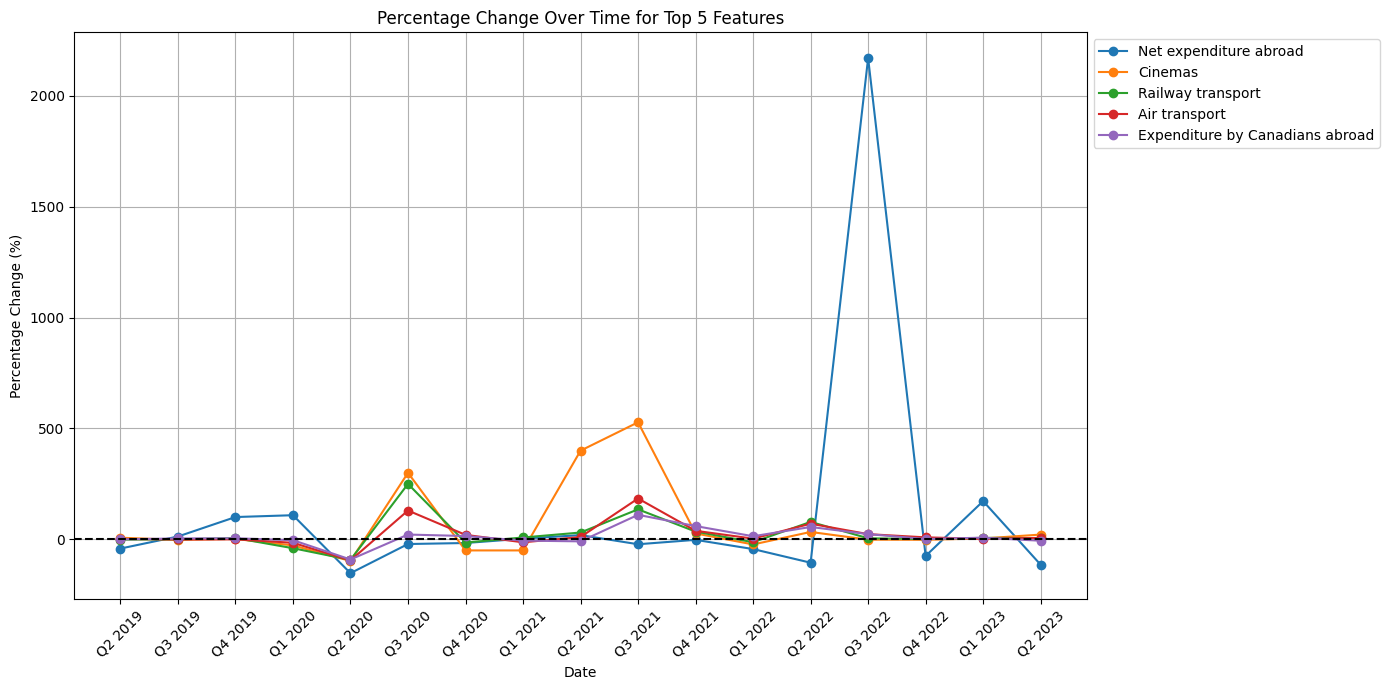

In [ ]:
# Extracting the top 5 features
top_5_features = avg_pct_change_top_10.head(5).index

# Plotting
plt.figure(figsize=(14, 7))
for feature in top_5_features:
    plt.plot(pct_change_data.index, pct_change_data[feature], marker='o', label=feature)

plt.title('Percentage Change Over Time for Top 5 Features')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Moving on to net government expenditure

In [ ]:
# Load the cleaned data
prov_data = pd.read_csv('/content/drive/My Drive/489_Data/provincal_gov_transposed_cleaned_no_dots.csv')

In [ ]:
prov_data['Equals: net lending or net borrowing'] = pd.to_numeric(
    prov_data['Equals: net lending or net borrowing'].str.replace(',', ''),
    errors='coerce'
)

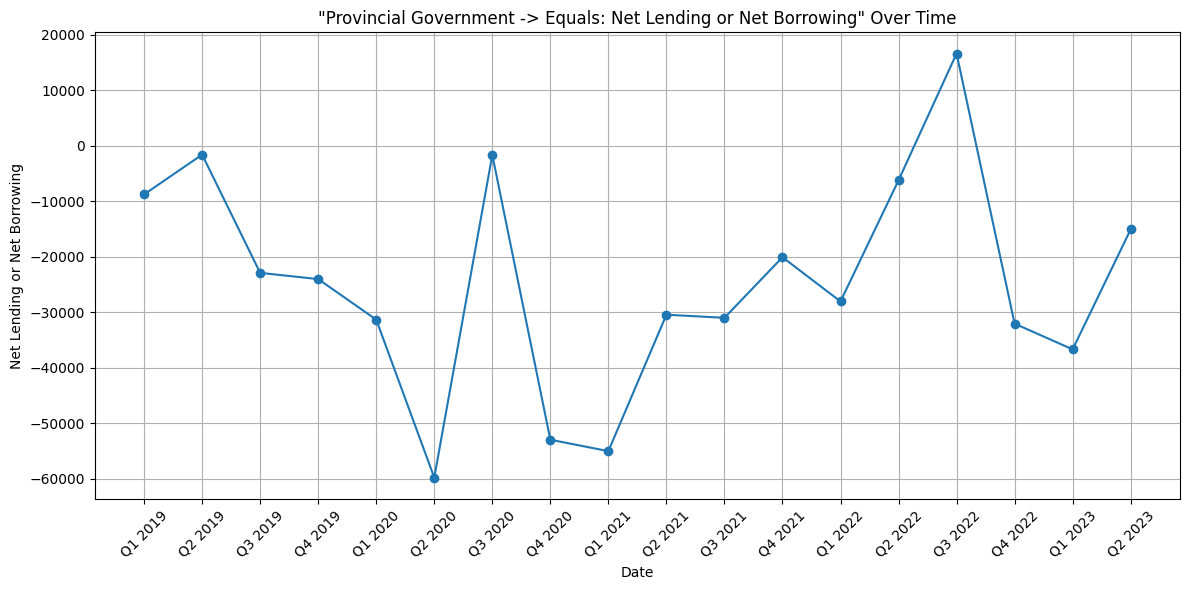

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(prov_data['Date'], prov_data['Equals: net lending or net borrowing'], marker='o', linestyle='-')
plt.title('"Provincial Government -> Equals: Net Lending or Net Borrowing" Over Time')
plt.xlabel('Date')
plt.ylabel('Net Lending or Net Borrowing')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
gov_df = pd.read_csv('/content/drive/My Drive/489_Data/federal_gov_expenditure_revenue.csv', index_col=0)


In [ ]:
gov_df['Equals: net lending or net borrowing'] = pd.to_numeric(
    gov_df['Equals: net lending or net borrowing'].str.replace(',', ''),
    errors='coerce'
)

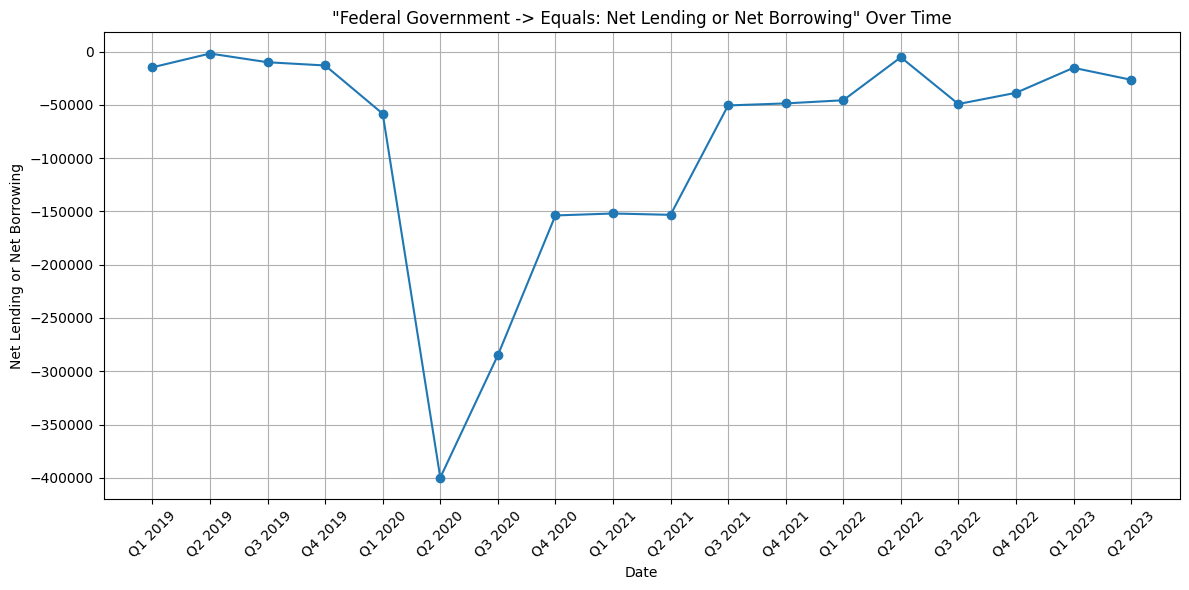

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(gov_df.index, gov_df['Equals: net lending or net borrowing'], marker='o', linestyle='-')
plt.title('"Federal Government -> Equals: Net Lending or Net Borrowing" Over Time')
plt.xlabel('Date')
plt.ylabel('Net Lending or Net Borrowing')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Creating a VAR for predicting future Household consumption

In [ ]:
# Cleaning
# Skip the metadata rows and use the "Estimates" row as header
data = pd.read_csv('/content/drive/My Drive/489_Data/3610010701-noSymbol (1).csv', skiprows=12, index_col=0)

data_transposed = data.transpose()
columns_to_drop = [
    "Household final consumption expenditure  [C<<OutputTruncated>>",
    "1",
    "How to cite: Statistics Canada. Table 36-10-0107-01\xa0 Household final consumption expenditure, quarterly, Canada (x 1,000,000)",
    "https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610010701"
]
data_cleaned = data_transposed.drop(columns=columns_to_drop, errors='ignore')
data_cleaned.index.name = "Quarters"
data_cleaned.reset_index(inplace=True)
data_cleaned = data_cleaned[data_cleaned["Quarters"] != "Dollars"]

def generate_quarters(num_rows):
    quarters = []
    year = 1961
    for _ in range(num_rows):
        for quarter in ["Q1", "Q2", "Q3", "Q4"]:
            quarters.append(f"{quarter} {year}")
            if len(quarters) == num_rows:
                return quarters
        year += 1

quarters_generated = generate_quarters(data_cleaned.shape[0])
data_cleaned["Quarters"] = quarters_generated

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

for column in data_cleaned.columns[1:]:
    data_cleaned[column] = data_cleaned[column].astype(str).str.replace(',', '').astype(float)

# Function to test stationarity
def test_stationarity(timeseries):
    # Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    return result[1] <= 0.05

# Check stationarity for 'Household final consumption expenditure [C]'
is_stationary = test_stationarity(data_cleaned['Household final consumption expenditure  [C]'])

# Convert data columns to float, excluding the "Quarters" column
data_cleaned.iloc[:, 1:] = data_cleaned.iloc[:, 1:].astype(float)

is_stationary = test_stationarity(data_cleaned['Household final consumption expenditure  [C]'])

is_stationary


False

In [ ]:
# Compute the correlation of all features with 'Household final consumption expenditure [C]'
correlations = data_cleaned.corr()['Household final consumption expenditure  [C]'].abs()

# Get the top 5 features influencing 'Household final consumption expenditure [C]'
top_5_features = correlations.nlargest(3).index[1:]  # Exclude the target column itself

# Check stationarity for the top 5 features
stationarity_results = {feature: test_stationarity(data_cleaned[feature]) for feature in top_5_features}

stationarity_results


<ipython-input-74-087185b8cf37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data_cleaned.corr()['Household final consumption expenditure  [C]'].abs()


{'Services  [CS]': False, 'Goods  [CG]': False}

In [ ]:
# Difference the columns to make them stationary
features_to_difference = ['Household final consumption expenditure  [C]'] + list(top_5_features)
data_differenced = data_cleaned[features_to_difference].diff().dropna()

# Check if differencing made the columns stationary
stationarity_after_differencing = {feature: test_stationarity(data_differenced[feature]) for feature in features_to_difference}

stationarity_after_differencing

{'Household final consumption expenditure  [C]': True,
 'Services  [CS]': True,
 'Goods  [CG]': True}

In [ ]:
from statsmodels.tsa.api import VAR

# Fit the VAR model
var_model = VAR(data_differenced)
var_model_fitted = var_model.fit(maxlags=15, ic='aic')

# Display a summary of the model
var_model_fitted.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 16, Oct, 2023
Time:                     19:10:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    45.8944
Nobs:                     243.000    HQIC:                   45.4824
Log likelihood:          -6478.75    FPE:                4.28837e+19
AIC:                      45.2045    Det(Omega_mle):     3.54170e+19
--------------------------------------------------------------------
Results for equation Household final consumption expenditure  [C]
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                   0.840527      1319.136473            0.001           0.999


In [ ]:
# Forecast the next 5 steps
forecast = var_model_fitted.forecast(data_differenced.values[-var_model_fitted.k_ar:], steps=5)

# Convert forecasted values to a DataFrame for better visualization
forecast_df = pd.DataFrame(forecast, columns=data_differenced.columns)

<ipython-input-78-a74c4447e360>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_values = data_cleaned['Household final consumption expenditure  [C]'].append(forecast_actual['Household final consumption expenditure  [C]'])


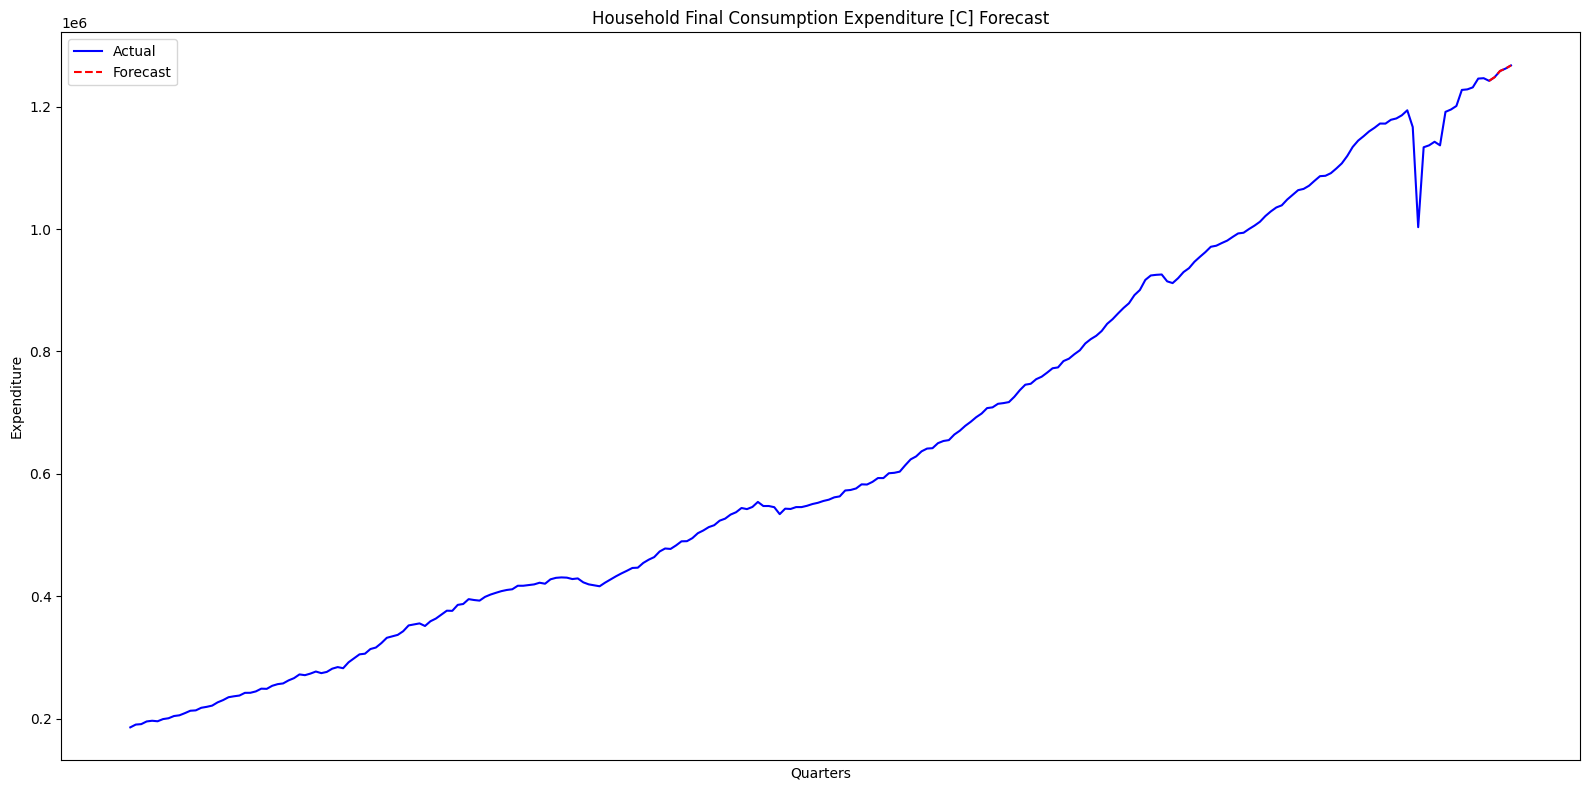

In [ ]:
# Convert combined index to string for consistent plotting
forecast_index = ['Forecast 1', 'Forecast 2', 'Forecast 3', 'Forecast 4', 'Forecast 5']
forecast_actual = forecast_df.cumsum().add(data_cleaned[features_to_difference].iloc[-1].values)

combined_index = data_cleaned.index.append(pd.Index(forecast_index))
combined_values = data_cleaned['Household final consumption expenditure  [C]'].append(forecast_actual['Household final consumption expenditure  [C]'])


combined_index_str = combined_index.astype(str)

# Plot the combined data
plt.figure(figsize=(16, 8))
plt.plot(combined_index_str, combined_values, label='Actual', color='blue')
plt.plot(forecast_index, forecast_actual['Household final consumption expenditure  [C]'].values, label='Forecast', color='red', linestyle='--')

plt.title('Household Final Consumption Expenditure [C] Forecast')
plt.xlabel('Quarters')
plt.ylabel('Expenditure')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()


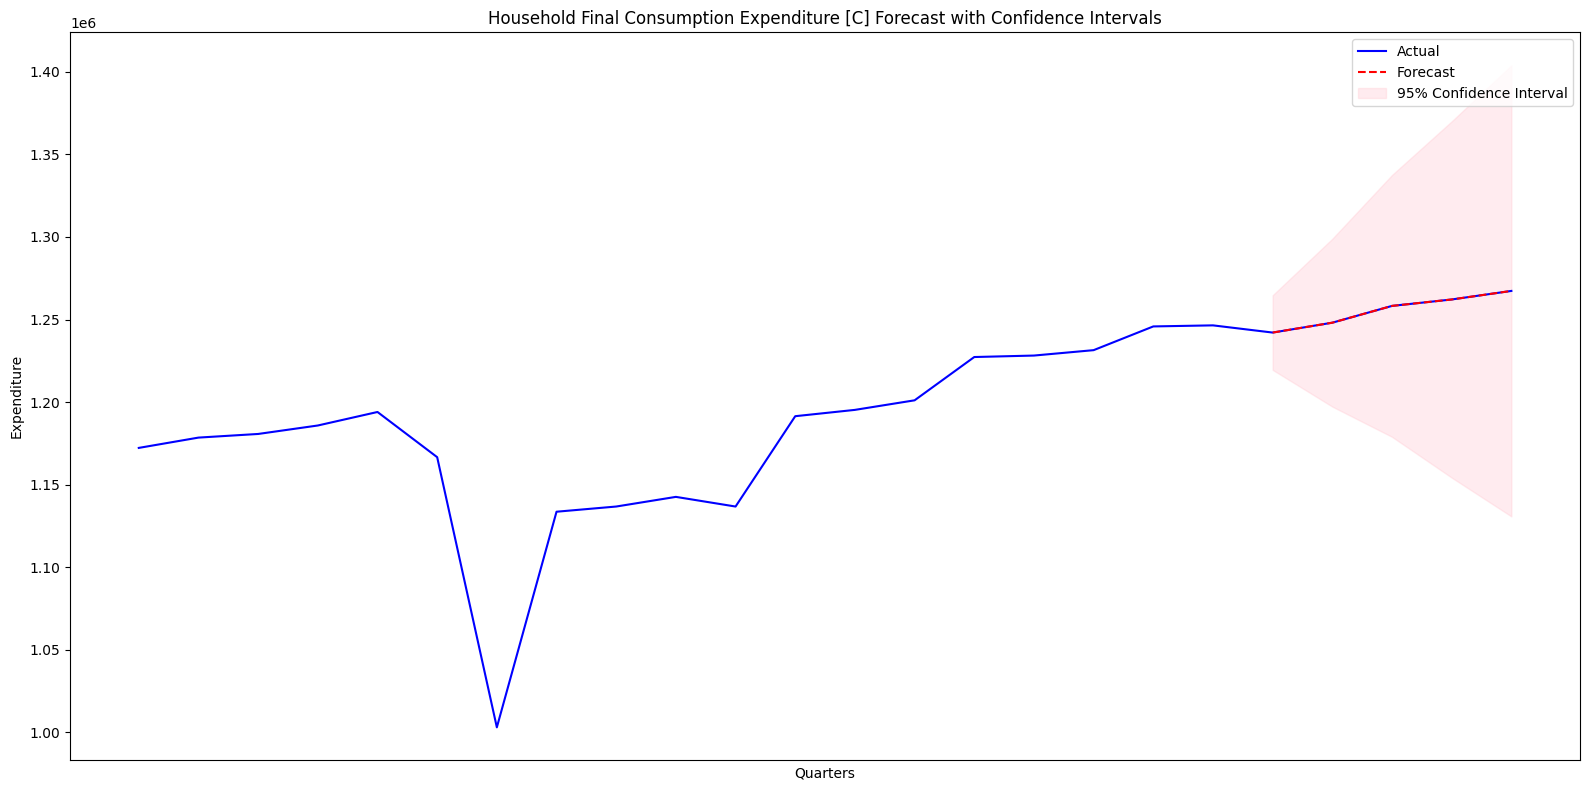

,Household final consumption expenditure [C],Services [CS],Goods [CG]
0,-4359.688037,-4113.299019,16.274782
1,5985.028105,2059.575404,4036.157876
2,10165.224883,5360.353982,4821.250935
3,3889.318469,2200.349886,1677.861087
4,5183.098548,3541.495831,1618.282809


In [ ]:
# Compute forecast with confidence intervals
forecast_with_ci = var_model_fitted.forecast_interval(data_differenced.values[-var_model_fitted.k_ar:], steps=5)

# Convert forecasted values with confidence intervals to a DataFrame for better visualization
forecast_lower = pd.DataFrame(forecast_with_ci[1], columns=data_differenced.columns)
forecast_upper = pd.DataFrame(forecast_with_ci[2], columns=data_differenced.columns)

# Reverse the differencing to get the actual forecasted values with confidence intervals
forecast_lower_actual = forecast_lower.cumsum().add(data_cleaned[features_to_difference].iloc[-1].values)
forecast_upper_actual = forecast_upper.cumsum().add(data_cleaned[features_to_difference].iloc[-1].values)


# Plot the combined data with confidence intervals
plt.figure(figsize=(16, 8))
plt.plot(combined_index_str[230:], combined_values[230:], label='Actual', color='blue')
plt.plot(forecast_index, forecast_actual['Household final consumption expenditure  [C]'].values, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast_lower_actual['Household final consumption expenditure  [C]'],
                 forecast_upper_actual['Household final consumption expenditure  [C]'], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Household Final Consumption Expenditure [C] Forecast with Confidence Intervals')
plt.xlabel('Quarters')
plt.ylabel('Expenditure')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()
forecast_df
